TP PERCEPTRON - BIARDEAU

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('house-votes-84.data')

np.random.seed(987654321)

df = df.sample(frac=1).replace(['y', 'n', '?', 'republican', 'democrat'], [1, -1, 0, 1, -1])
df.insert(1,"poids seuil",1)

votesClass = df.values[:-100, 0].copy()
votesData = df.values[:-100, 1:].copy()

testClass = df.values[-100:, 0].copy()
testData = df.values[-100:, 1:].copy()

In [11]:
def invert(votesData, votesClass):
    for i in range(len(votesData)):
        if votesClass[i] == -1:
            votesData[i, :] *= -1
            votesClass[i] = 1
    return votesData, votesClass

In [12]:
#Change le poids en additionnant le poids actuel et le vecteur n'ayant pas été classifié correctement

def changeWeight(data, weight):
    for i in range(len(data)):
        weight[i] += data[i]
    return weight

In [13]:
def classify(data,weight): 
    return 1 if(np.dot(weight,data)>=0) else -1

In [14]:
#Algo de perceptron avec un nombre maximum d'iterations donnés

def trainIteration(nbIterMax, weight, data):
    tabError = []
    
    for i in range(nbIterMax):
        tabClassify = []
        
        for x in range(len(data)):
            tabClassify.append(classify(data[x, :], weight))
            #Si mal classifié, on change les poids
            if tabClassify[x] < 0:
                weight = changeWeight(data[x, :], weight)
                
        tabError.append(calculateErrorRate(np.array(tabClassify)))
    return tabError, weight

In [15]:
#Algo de perceptron avec un % d'erreur maximum
#On fait attention de ne pas faire trop d'iteration : si on en fait trop, c'est qu'on ne peut pas obtenir un % d'erreur max
#inferieur a celui voulu

def trainErrorRate(maxErrorRate, weight, data):
    tabError = []
    errorRate = 100
    cpt = 0
   
    while errorRate >= maxErrorRate and cpt < 2000:
        tabClassify = []
        for x in range(len(data)):
            tabClassify.append(classify(data[x, :], weight))
            #Si mal classifié, on change les poids
            if tabClassify[x] < 0:
                weight = changeWeight(data[x, :], weight)
                
        errorRate = calculateErrorRate(np.array(tabClassify))
        tabError.append(errorRate)
        cpt += 1
    return tabError, weight, cpt

In [16]:
# calcul du % d'erreur selon le tableau de classe

def calculateErrorRate(tabClass):
    return np.count_nonzero(tabClass < 0) / len(tabClass) * 100

In [17]:

def classTest(data, weight):
    tabClassify = []
    for x in range(len(data)):
        C = classify(data[x, :], weight)
        tabClassify.append(C)
    errorRate = calculateErrorRate(np.array(tabClassify))
    return errorRate

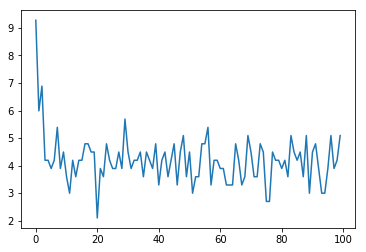

5.09 % d'erreur


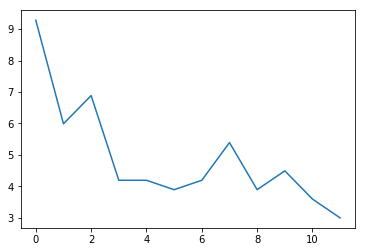

Nombre d'iterations :  12
2.99 % d'erreur


In [18]:
dataBis, classBis = invert(votesData, votesClass)


weightInit = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

error1, weight1 = trainIteration(100, weightInit.copy(), dataBis)
plt.plot(error1)
plt.show()
print(round((error1[len(error1) - 1]),2), "% d'erreur")


error2, weight2, cpt = trainErrorRate(3, weightInit.copy(), dataBis)
plt.plot(error2)
plt.show()
print("Nombre d'iterations : " , cpt)
print(round((error2[len(error2) - 1]),2), "% d'erreur")